<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [27]:
function binomial_p(n, k, p)
    pdf=((factorial(n))./((factorial(k)).*(factorial(n .- k)))).*(p.^k).*((1-p).^(n-k))
    return pdf
end

binomial_p (generic function with 1 method)

In [28]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [30]:
win=binomial_p(10,5,0.4)
win

0.20065812480000003

The chance of losing the bet:

In [31]:
lose=1-win
lose

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [32]:
expected_outcome=(win.*30)+(lose.*(-10))
expected_outcome

-1.973675007999999

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [35]:
win_4=binomial_p(10,4,0.4)
print(win_4)

0.250822656

In [36]:
lose_4=1-win_4
print(lose_4)

0.749177344

In [37]:
expected_outcome_4=(win_4.*30)+(lose_4.*(-10))
expected_outcome_4

0.03290623999999909

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [38]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\jiayi\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Manifest.toml`


In [39]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [40]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [42]:
using Polynomials: Polynomial, fit, coeffs
line_fit=fit(x,y_observed,1)
fit_coeff=coeffs(line_fit)

2-element Vector{Float64}:
 -3.8571930313327467
  3.0720057915734085

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [44]:
function chisqr(b,m,x,y_observed, sigma)
    chivalue = sum((y_observed.- m.*x .-b ).^2/sigma.^2)
end

chisqr (generic function with 1 method)

In [45]:
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

24.066510645284584

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [47]:
chi2_list = []
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    fit_coeff = Polynomials.fit(x,y_observed,1)
    coef = Polynomials.coeffs(fit_coeff)
    a = chisqr(coef[1],coef[2],x,y_observed,sigma)
    push!(chi2_list, a)
end
chi2_list

10000-element Vector{Any}:
 11.394329846011226
  8.250115277752796
  6.384681310571234
  8.771472339142019
  4.643959647818608
 16.204204795045435
 11.190877243789403
  6.463875801898061
  8.820323653786314
  4.507743047359974
  3.8307088033460714
 10.743236250872346
  9.445187634041508
  ⋮
 14.666248006089733
  5.138621288914833
  3.2335271449782246
 13.09358570916308
 10.422595818440438
  6.590896174857958
 10.75832818238353
  4.759974165868166
  5.45627973970874
 12.045474395618392
 12.422068081870224
  4.899659082187248

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [48]:
mean(chi2_list)

8.998382409294079

This answer is close to 9 which makes sense. The degree of freedom is to be expected since the mean of chi squared should be the numbers(N=11) minus the parameters(p=2), which is 9.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

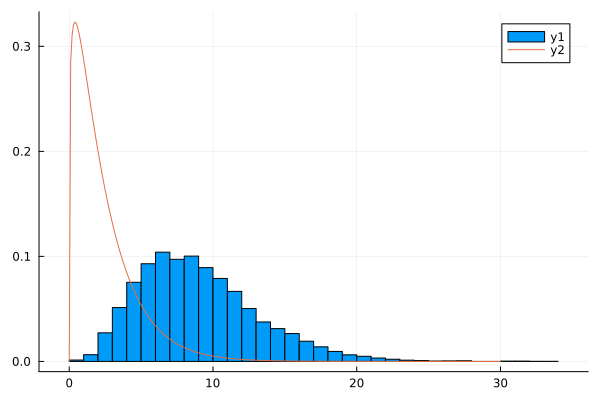

In [51]:
x_dist=0:0.1:30
chi2=di.Chisq(2.4)
histogram(chi2_list,bin=50,normalize=true)
plot!(x_dist, di.pdf.(di.Chisq(2.4),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [56]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

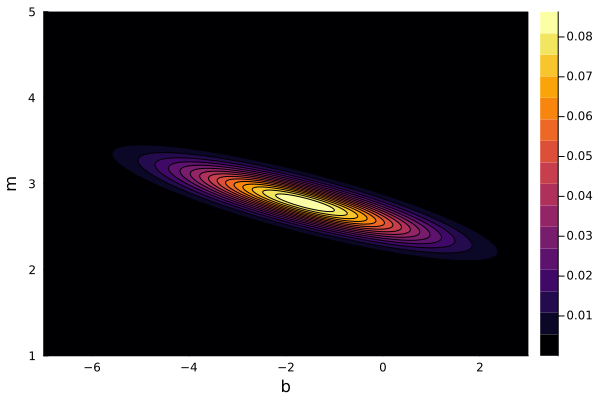

In [60]:
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

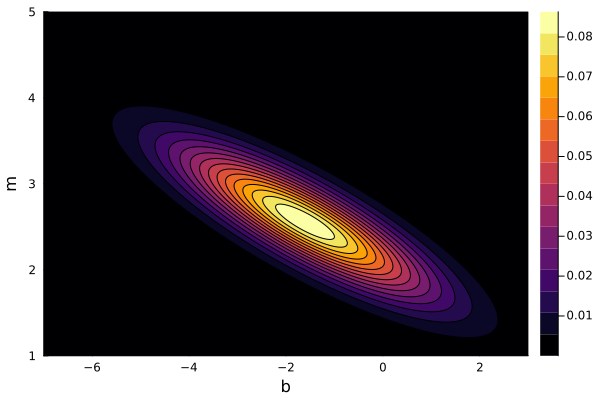

In [69]:
x_1=0:0.5:5
y_true = 3 .* x_1 .- 2
y_observed = y_true .+ noise
chi2poly(b, m) = chisqr(b, m, x_1, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The new plot is bigger. The redius is bigger and the graph is more pointing to the right bottom corner.

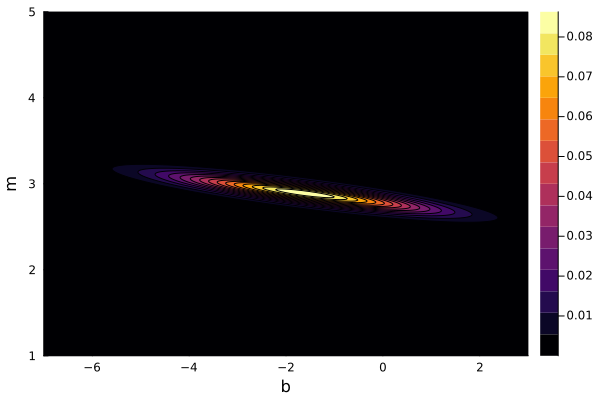

In [73]:
x_2 = 0:2:20
y_true = 3 .* x_2 .- 2
y_observed = y_true .+ noise
chi2poly(b, m) = chisqr(b, m, x_2, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

It becomes much thinner, and a lower radius.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

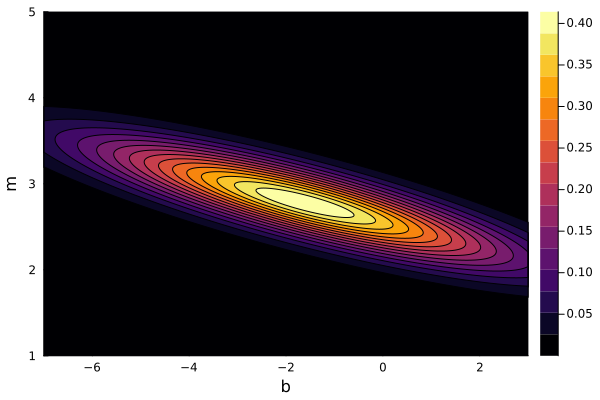

In [76]:
x = 0:1:10
sigma_1=5
y_true = 3 .* x .- 2
y_observed = y_true .+ noise
noise = Random.rand(di.Normal(0,sigma_1),length(x))
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma_1)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The size becomes bigger again because the increase of the sigma which leads to larger noise for b.

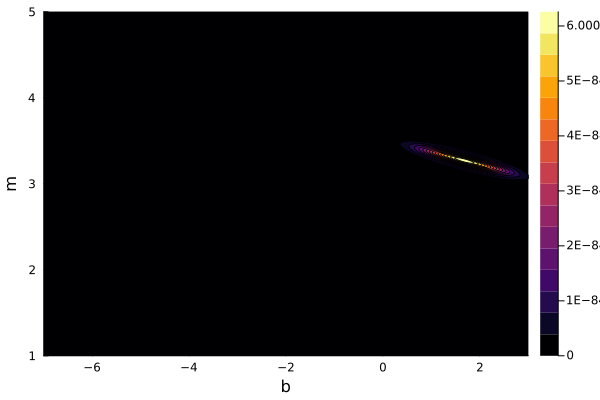

In [77]:
x = 0:1:10
sigma_2=1
y_true = 3 .* x .- 2
y_observed = y_true .+ noise
noise = Random.rand(di.Normal(0,sigma_2),length(x))
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma_2)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The graph is much narrow than before, smaller sigma leads to smaller b.